In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
import pyprind
from pydeeptoy.networks import *
from pydeeptoy.optimizers import *
from pydeeptoy.losses import *
from sklearn.metrics import accuracy_score

/Users/kirill/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
mnist = np.loadtxt('mnist/train.csv', delimiter=',', skiprows=1)
X = mnist[:, 1:]
y = mnist[:, 0]
mnistMean, mnistStd = np.mean(X), np.std(X)
X = (X - mnistMean)/mnistStd
one_hot_y = np.array(LabelBinarizer().fit_transform(y).T)

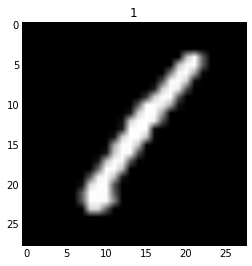

In [3]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(np.argmax(one_hot_y[:, 0]))

In [24]:
X.reshape(-1, 1, 28, 28)[0].shape

(1, 28, 28)

In [20]:
cg = ComputationalGraph()
x_in = cg.constant(X.reshape(-1, 1, 28, 28)[0])
w_in = 0.01*np.random.randn(16, 3)
#w_in = np.ones(shape=(16, 3))
conv = cg.conv2d(x_in, cg.constant(w_in), receptive_field_size=4, filters_number=3, stride=2, padding=0)
ctx = SimulationContext()
ctx.forward(cg)
plt.imshow(ctx[conv].value[0, 0, :].reshape(13, 13, 3), cmap='gray')

IndexError: tuple index out of range